# <Credit.csv> dataset

## Load the dataset

In [125]:
# import all modules required for the analyses
import os
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm
from statsmodels.stats.api import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
try:
    dir_path = r"/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/Linear Regression"
    os.chdir(dir_path)
except:
    dir_path = r"/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/Linear Regression"
    os.chdir(dir_path)

In [127]:
# change working directory
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/Linear Regression'

In [128]:
raw_df = pd.read_csv("Credit.csv", index_col=0)

## a.	Start with a descriptive study of the variables

In [129]:
# read the Advertising data
D = raw_df.copy()
D.info()
D.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


The dataset is composed of 400 rows, 11 variables, of which 4 are categoricals. Each row represents an individual, and each variables gives an information on his/her credit situation. 

The goal of this analysis is to comprehend which factors influence the Credit Card Balance of a cardholder and to predict the average Balance of a given individual.

Let's try to analyze the different variables that make up the credit dataset : 
- income : the income in 10k 
- limit : the credit limit on their credit card
- rating : the credit rating of individuals
- cards : the number of cards they own
- age : the individuals ages
- education : number of years of education
- gender : the individuals genders
- student : whether they are students or not
- married : whether they are married or not
- ethnicity : to which ethinicity they belong 
- balance : average credit balance on their bank account in $

In [130]:
# check a basic statistical summary of the data
D.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


## b.	Follow up with scatter plots and correlations

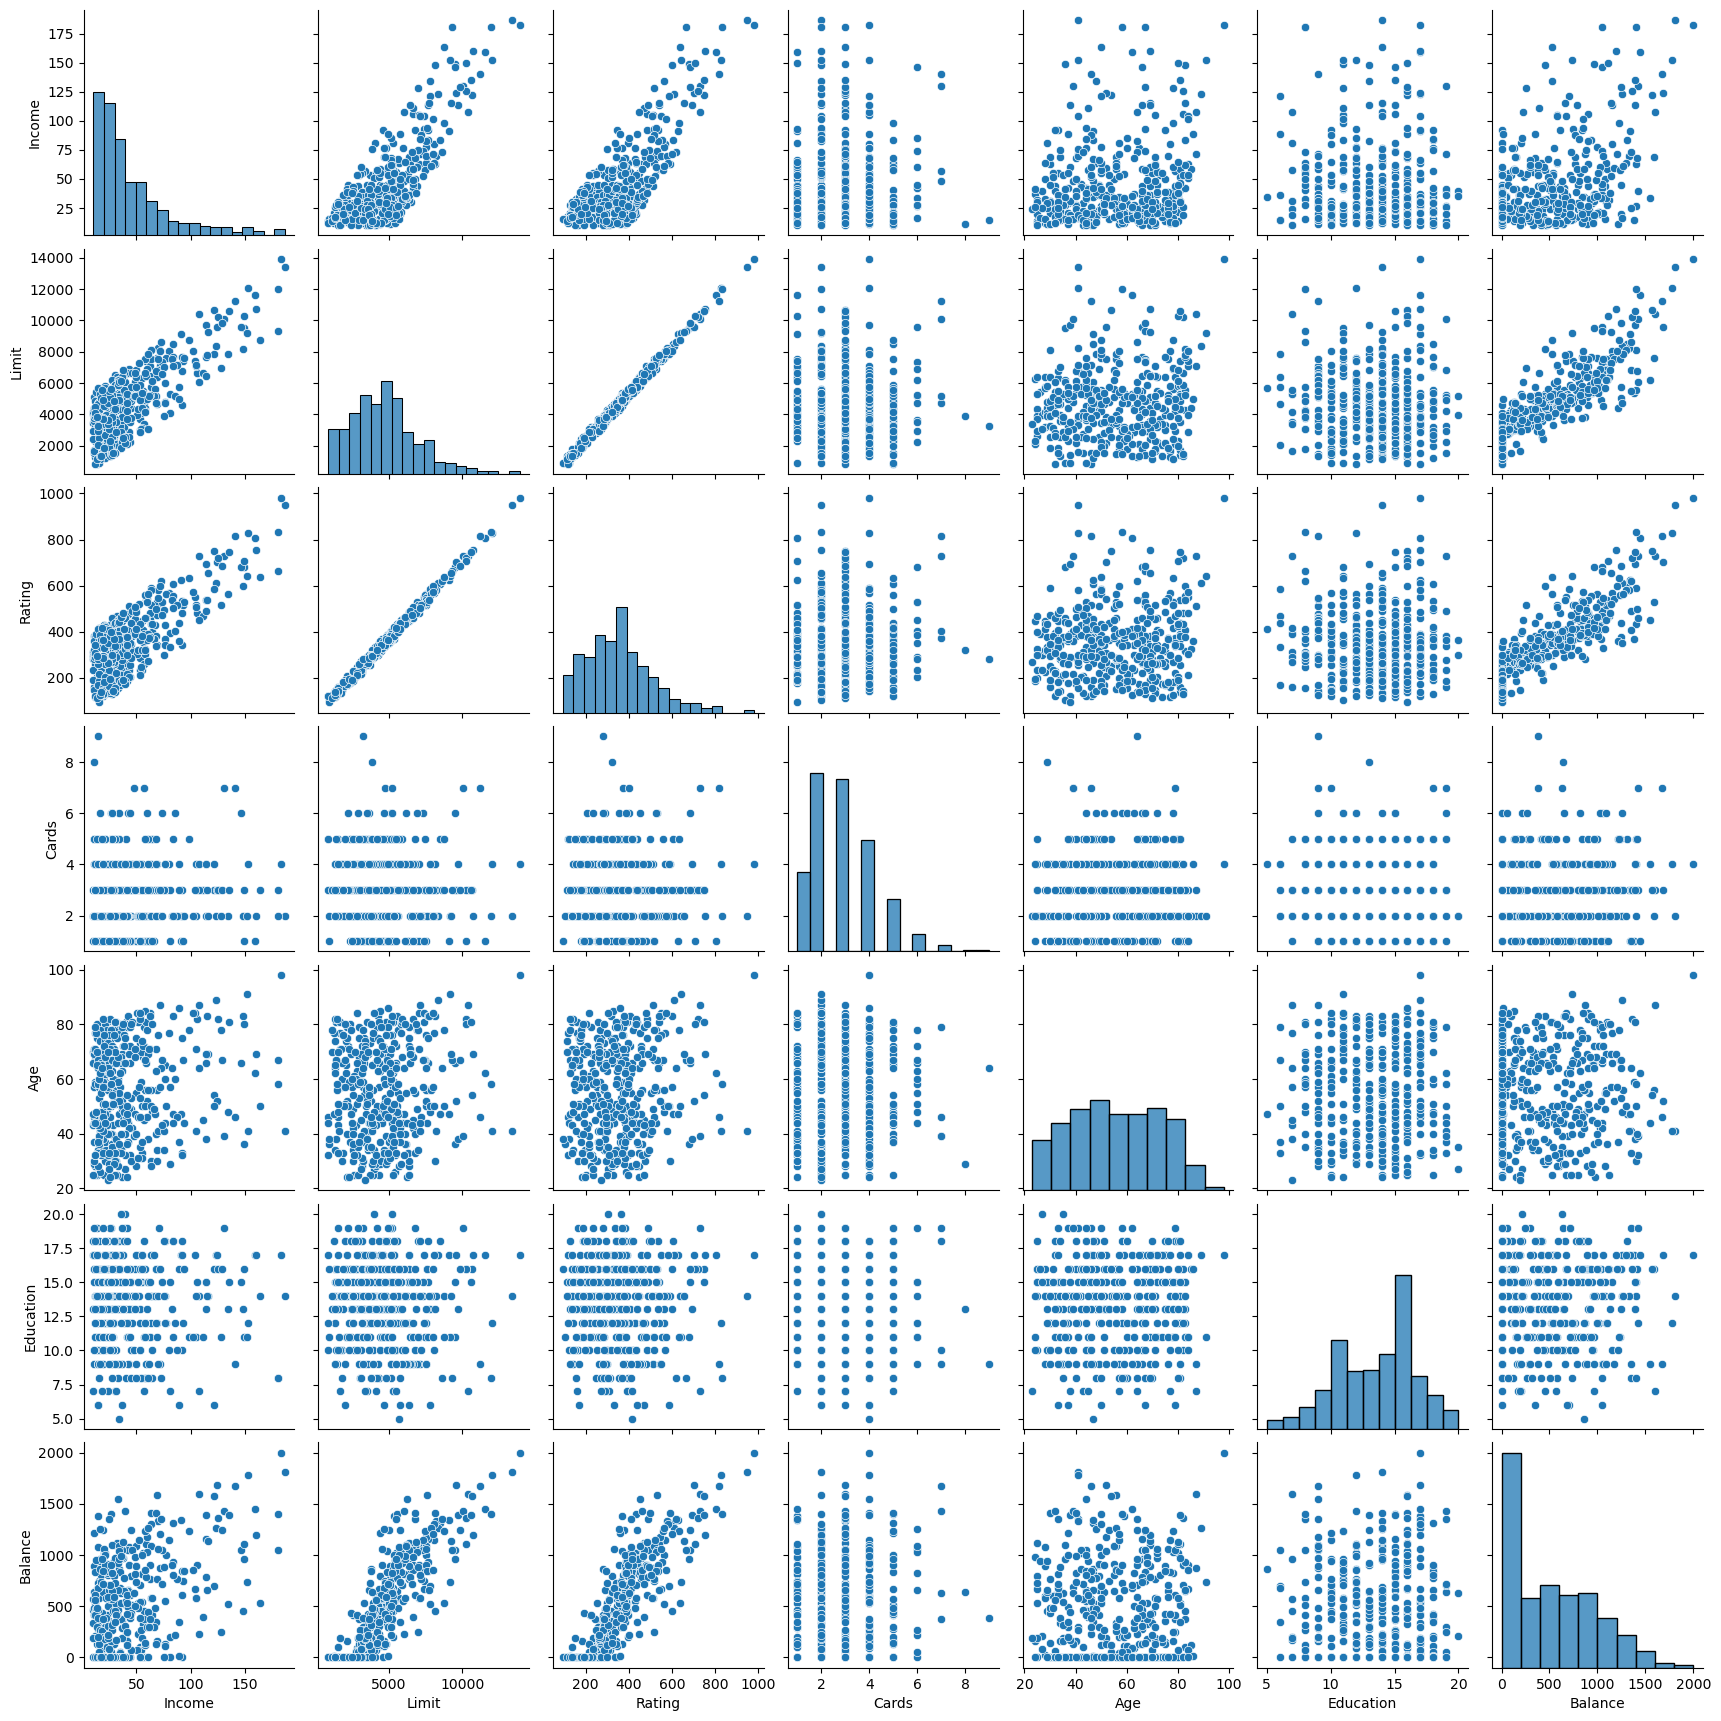

In [131]:
# descriptive statistics
sns.pairplot(D)
plt.show()

([<matplotlib.axis.YTick at 0x7fbda689bb50>,
 [Text(0, 0, 'Income'),
  Text(0, 1, 'Limit'),
  Text(0, 2, 'Rating'),
  Text(0, 3, 'Cards'),
  Text(0, 4, 'Age'),
  Text(0, 5, 'Education'),
  Text(0, 6, 'Balance')])

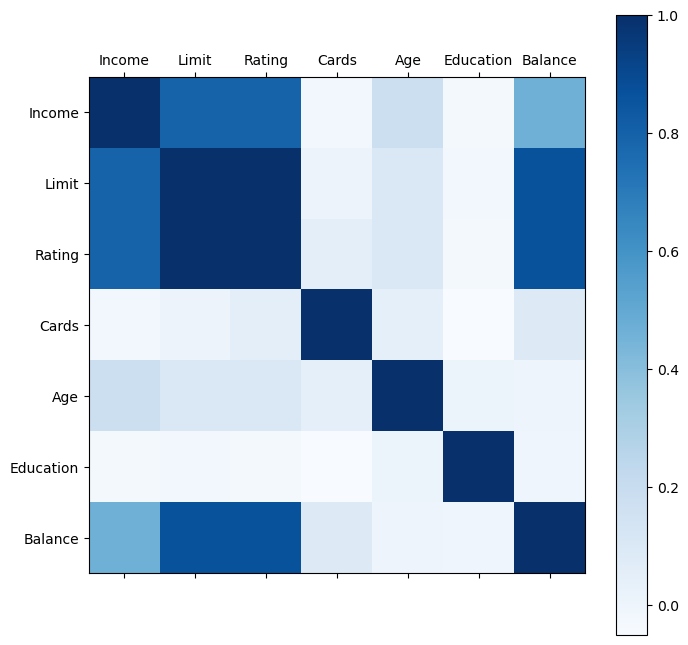

In [132]:
D = D.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,8))
plt.matshow(D.corr(), cmap=plt.cm.Blues, fignum=1)
plt.colorbar()
tick_marks = [i for i in range(len(D.columns))]
plt.xticks(tick_marks, D.columns)
plt.yticks(tick_marks, D.columns)

### i.	Anything special ?

We can see clear highly positive correlations between Rating, Limit and Income.


Balance appears correlated with Limit, Rating, and moderately correlated with Income.


Since Limit seems to be too correlated to other variables, it might induce colinearity issues. We should eliminate it from the following analysis. 

### ii.	If so, adjust the dataset accordingly

In [133]:
D = D.drop(['Limit'], axis = 1)

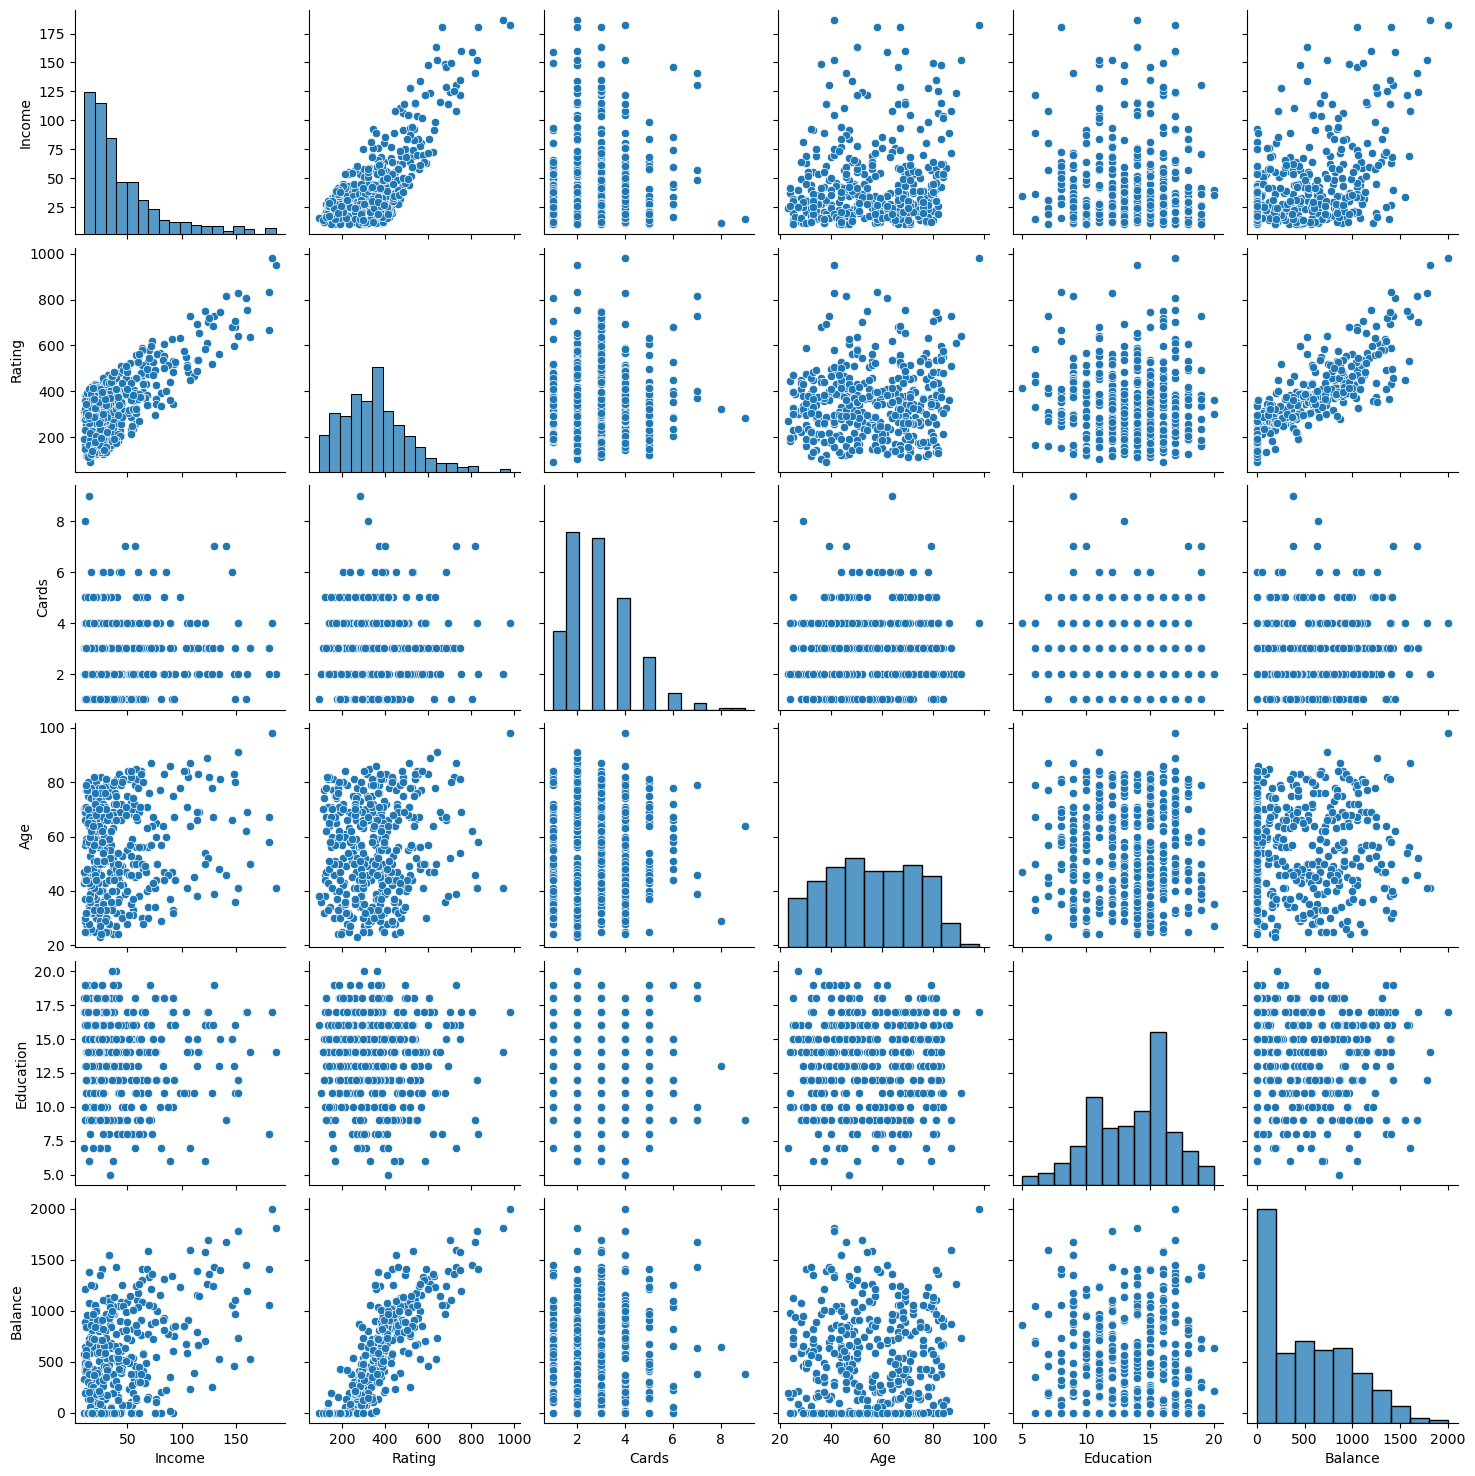

In [134]:
# descriptive statistics
sns.pairplot(D)
plt.show()

We have in those plots a lower risk of colinearity issues ; we can go further in our investigation. 

## c.	Compare the model with and without the qualitative data (dummy variables)

### With qualitative data

In [135]:
# select and print active variables
DActives = raw_df[['Gender','Student','Married','Ethnicity']]
print(DActives)

# define p = number of variables
p = DActives.shape[1]

# define n = number of observations
n = DActives.shape[0]

     Gender Student Married         Ethnicity
1      Male      No     Yes         Caucasian
2    Female     Yes     Yes             Asian
3      Male      No      No             Asian
4    Female      No      No             Asian
5      Male      No     Yes         Caucasian
..      ...     ...     ...               ...
396    Male      No     Yes         Caucasian
397    Male      No      No  African American
398  Female      No     Yes         Caucasian
399    Male      No     Yes         Caucasian
400  Female      No      No             Asian

[400 rows x 4 columns]


In [136]:
# dummy coding (one hot encoding)
X = pd.get_dummies(raw_df[['Gender','Student','Married','Ethnicity']], columns = ['Gender','Student','Married','Ethnicity'])
print(X)

# define M = total number of modalities
M = X.shape[1]
print(M)

     Gender_Female  Gender_Male  Student_No  Student_Yes  Married_No  \
1                0            1           1            0           0   
2                1            0           0            1           0   
3                0            1           1            0           1   
4                1            0           1            0           1   
5                0            1           1            0           0   
..             ...          ...         ...          ...         ...   
396              0            1           1            0           0   
397              0            1           1            0           1   
398              1            0           1            0           0   
399              0            1           1            0           0   
400              1            0           1            0           1   

     Married_Yes  Ethnicity_African American  Ethnicity_Asian  \
1              1                           0                0   
2    

In [137]:
X = X[['Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_African American', 'Ethnicity_Asian', 'Ethnicity_Caucasian']]
Y = raw_df.select_dtypes(include = ['float64', 'int64'])

In [138]:
df = pd.concat([Y, X], axis = 1)
df

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0,0,1,0,0,1
2,106.025,6645,483,3,82,15,903,1,1,1,0,1,0
3,104.593,7075,514,4,71,11,580,0,0,0,0,1,0
4,148.924,9504,681,3,36,11,964,1,0,0,0,1,0
5,55.882,4897,357,2,68,16,331,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,560,0,0,1,0,0,1
397,13.364,3838,296,5,65,17,480,0,0,0,1,0,0
398,57.872,4171,321,5,67,12,138,1,0,1,0,0,1
399,37.728,2525,192,1,44,13,0,0,0,1,0,0,1


In [139]:
y = df['Balance']
x = df[['Income', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_African American', 'Ethnicity_Asian', 'Ethnicity_Caucasian']]
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          4.46e-248
Time:                        09:02:59   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Without qualitative data

In [140]:
D

,Income,Rating,Cards,Age,Education,Balance
1,14.891,283,2,34,11,333
2,106.025,483,3,82,15,903
3,104.593,514,4,71,11,580
4,148.924,681,3,36,11,964
5,55.882,357,2,68,16,331
...,...,...,...,...,...,...
396,12.096,307,3,32,13,560
397,13.364,296,5,65,17,480
398,57.872,321,5,67,12,138
399,37.728,192,1,44,13,0


In [141]:
# run multiple regression with two predictors
y = D['Balance']
X = D[['Income', 'Rating', 'Cards', 'Age', 'Education']]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     559.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.97e-176
Time:                        09:03:00   Log-Likelihood:                -2601.1
No. Observations:                 400   AIC:                             5214.
Df Residuals:                     394   BIC:                             5238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -525.9183     51.522    -10.208      0.0

### i.	Which is best ? Based on what criteria ?

- R-squared : better on the model with qualitative variables 
- parcimony of the model : AIC and BIC are lower on the model with qualitative variables 

Based on those 2 criterias, it seems best to keep qualitative variables 

## d.	Implement a model selection

After trying multiples models with different variables, the model with the variables Income, Rating, Cards and Student is the most satisfying.

In [155]:
y = df['Balance']
x = df[['Income', 'Rating', 'Cards', 'Student_Yes']]
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1876.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          2.06e-255
Time:                        09:25:07   Log-Likelihood:                -2420.2
No. Observations:                 400   AIC:                             4850.
Df Residuals:                     395   BIC:                             4870.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -591.2360     17.182    -34.411      

### i.	What criteria did you use? What is your most parsimonious model?

The model above is the one with the best r-squared (0.950 -> very close to the mean) and the most parcimonious (AIC : 4850 & BIC : 4870 which are quite high)

Other models had worst criterias 

## e.	Give an interpretation of your results

### i.	Coefficients

- the t value is negative for Income, even though it is the main contributor in the augmentation of the r-squared value
- the P value of the Cards variable is > alpha, it might not be pertinent here 
- Rating and Student variables are pertinent in this model 

### ii.	Performance

The r-squared value (variance proportion) is at 95% close to the mean, meaning that our model is quite efficient

### iii.	Accuracy / Confidence

In [157]:
model_glm_2 = glm('Balance ~ Income + Rating + Cards + Student_Yes', data=df, family=sm.families.Gaussian()).fit()
model_glm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Balance   No. Observations:                  400
Model:                            GLM   Df Residuals:                      395
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          10675.
Method:                          IRLS   Log-Likelihood:                -2420.2
Date:                Thu, 23 Feb 2023   Deviance:                   4.2166e+06
Time:                        09:40:01   Pearson chi2:                 4.22e+06
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -591.2360     17.182    -34.411      0.000    -624.912    -557.560
Income         -7.8513      0.241    -32.527      0.000      -8.324      -7.378
Rating          3.9814      0.055     72.335      0.000       3.874       4.089
Cards           3.7851      3.797      0.997      0.319      -3.657      11.227
Student_Yes   419.1517     17.235     24.320      0.000     385.372     452.931
===============================================================================
"""

In [158]:
# calculate standardized residuals
fitted_values = model_glm_2.fittedvalues
std_residuals = model_glm_2.resid_pearson

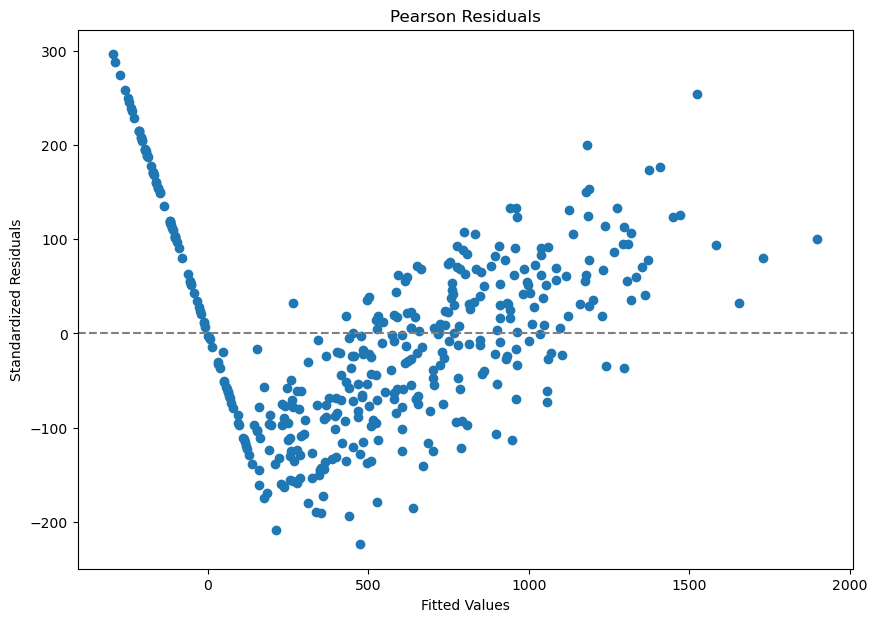

In [159]:
# plot standardized residuals
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(fitted_values, std_residuals)
ax.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Pearson Residuals')
plt.show()

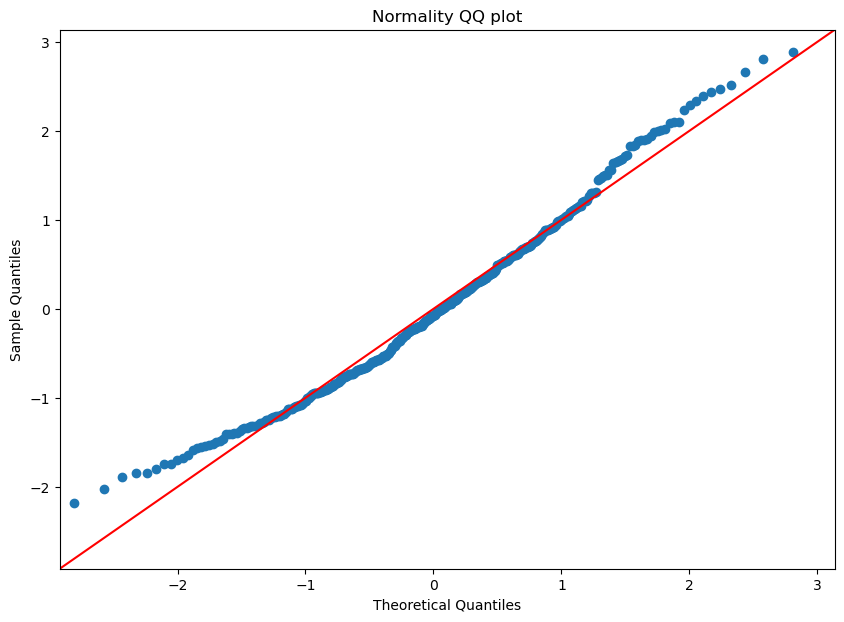

In [160]:
# check residuals normality plot
plt.rc("figure", figsize=(10,7))
sm.qqplot(model_glm_2.resid_pearson, fit=True, line="45")
plt.title('Normality QQ plot')
plt.show()

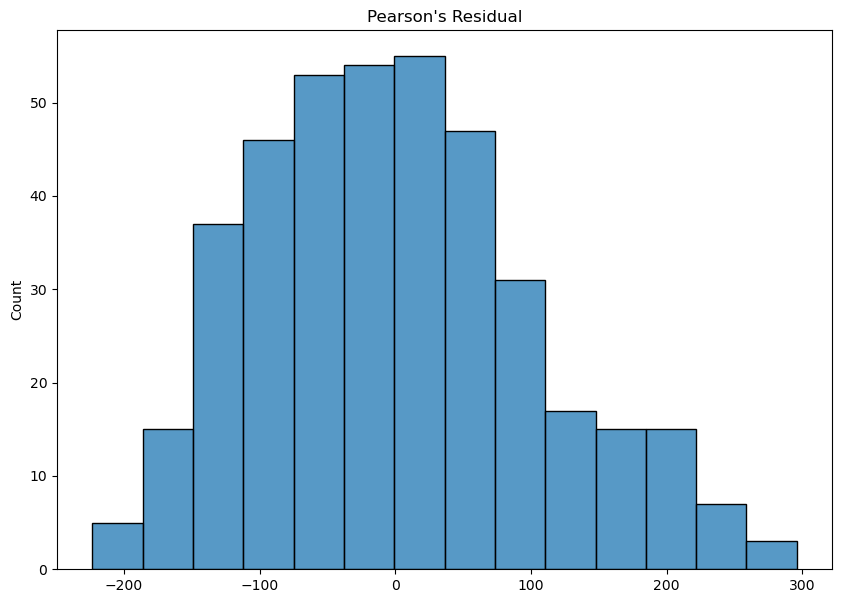

In [161]:
# check pearson's residuals distribution (histogram)
sns.histplot(model_glm_2.resid_pearson).set(title="Pearson's Residual");

We can see on the graphs above that the scatter plot representing the residuals have a clear shape - meaning our model isn't quite accurate enough. 



### iv.	Generalization to the population ?

## f.	Write your report including your recommendations